# 4TIN811U Machine Learning & Deep Learning
# TP 1 - Régression linéaire

In [1]:
# Quelques librairies utiles
# %matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

import random as rd

## 1. Régression linéaire simple \& Descente de gradient batch

On se place dans le cas "simple" : on a une seule feature ($n = 1$), et on souhaite faire une régression linéaire. On cherche donc deux paramètres $\theta_0$ et $\theta_1$. On va travailler avec un jeu de données très simple, que l'on va générer nous-mêmes : les $x$ vont varier de $-10$ à $+10$ avec un pas de $0.1$, et on prendra $$y^{(i)} = 2 - \frac{x^{(i)}}{2} + \varepsilon^{(i)},$$ où $\varepsilon^{(i)}$ est une petite erreur tirée aléatoirement. Si tout se passe bien, notre algorithme devra donc trouver $\theta_0 \approx 2$ et $\theta_1 \approx -0.5$.

In [2]:
X = np.linspace(-10, 10, 101)
Y = np.array([2 + -.5*x + np.random.normal(0,1) for x in X])

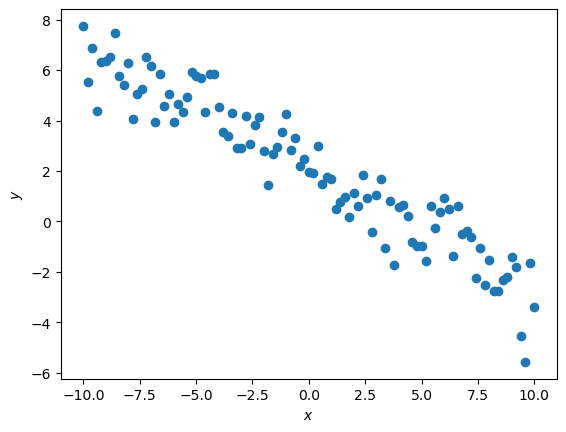

In [3]:
# On affiche les données
plt.clf() # Clear previous plots
plt.plot(X, Y, 'o')
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.show()

On veut calculer l'erreur quadratique $J(\theta_0, \theta_1)$ ainsi que ses dérivées $\frac{\partial J}{\partial \theta_0}(\theta_0, \theta_1)$
et $\frac{\partial J}{\partial \theta_1}(\theta_0, \theta_1)$, puis la descente de gradient.

In [4]:
def square_error_simple(theta0, theta1, X, Y):
    """Returns the square error of theta0, theta1 on training examples (X, Y)."""
    return .5*np.sum((theta0 + theta1*X - Y)**2)

In [5]:
def derivative_square_error_simple(theta0, theta1, X, Y):
    """Returns a pair of floats, containing the partial derivatives of the error relatively to theta0 and theta1."""
    return (np.sum((theta0 + theta1*X - Y)), np.sum((theta0 + theta1*X - Y)*X))

In [6]:
print(f"Error: {square_error_simple(0, 0, X, Y)}")
print(f"Gradient: {derivative_square_error_simple(0, 0, X, Y)}")

Error: 669.6810156686886
Gradient: (-211.65673036750198, 1663.7570795405572)


In [7]:
def one_step_simple_linear_regression_gradient_descent(theta0, theta1, X, Y, learning_rate):
    """One step of the gradient descent for the simple linear regression. Takes the parameters, the training examples and the learning rate, and returns the new values for the parameters."""
    g0, g1 = derivative_square_error_simple(theta0, theta1, X, Y)
    return (theta0 - learning_rate * g0, theta1 - learning_rate * g1)

In [8]:
def simple_linear_regression_gradient_descent(X, Y, nb_steps, learning_rate = .01):
    """Simple batch gradient descent algorithm to compute a linear regression.
    Takes the training examples and the learning rate (0.01 by default) and returns (theta0, theta1, theta0_hist, theta1_hist) where theta0_hist, theta1_hist are the lists of all values taken by theta0 and theta1.
    Halting condition: when the number of steps is reached."""
    theta0_hist = [0]
    theta1_hist = [0]
    theta0 = 0
    theta1 = 0
    for _ in range(nb_steps):
        (theta0, theta1) = one_step_simple_linear_regression_gradient_descent(theta0, theta1, X, Y, learning_rate)
        theta0_hist.append(theta0)
        theta1_hist.append(theta1)
    return (theta0, theta1, theta0_hist, theta1_hist)

On affiche un plot de l'erreur. Comme elle prend deux paramètres en entrée, on obtient un plot en 3D.

theta0: 2.0955294140443264; theta1: -0.4844953638731965


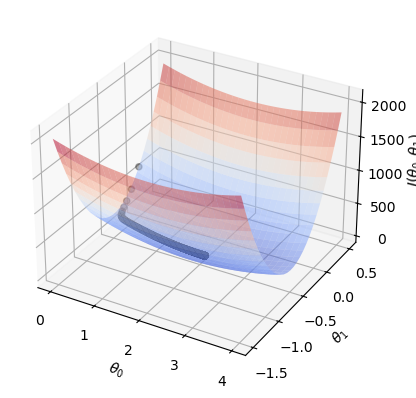

In [9]:
ax = plt.figure().add_subplot(projection='3d')
t0 = np.linspace(0, 4, 61) # Valeurs de theta_0 de 0 à 4
t1 = np.linspace(-1.5, .5, 31) # Valeurs de theta_1 de 0 à 4
T0, T1 = np.meshgrid(t0, t1) # Quadrillage

square_error_vect = np.vectorize(square_error_simple, excluded={2,3})
E = square_error_vect(T0, T1, X, Y) # Calcul de l'erreur

# Affichage la fonction d'erreur
ax.plot_surface(T0, T1, E, cmap=plt.cm.coolwarm, alpha=.5) 
ax.set_xlabel('$\\theta_0$')
ax.set_ylabel('$\\theta_1$')
ax.set_zlabel('$J(\\theta_0, \\theta_1)$')

# Affichage des points calculés par la descente de gradient.
theta0, theta1, theta0_hist, theta1_hist = simple_linear_regression_gradient_descent(X, Y, 1000, learning_rate = .0001)
print(f"theta0: {theta0}; theta1: {theta1}")
ax.scatter3D(theta0_hist, theta1_hist, square_error_vect(theta0_hist, theta1_hist, X, Y), color="black")
plt.show()

Réitérer les expériences précédentes avec un autre taux d'apprentissage. Quel est l'ordre de grandeur du taux d'apprentissage $\alpha$ à partir duquel la méthode se met à converge ?

*Réponse :* Environ $10^{-4}$.

### Aparté : np.vectorize

Que fait la fonction `np.vectorize` ? À quoi sert l'option `excluded` ?

*Réponse :* Permet de transformer une fonction $f$ du type `S -> T` en une fonction `array[S] -> array[T]` qui applique  $f$ sur chaque élément du tableau. Excluded est utile lorsque la fonction a plusieurs paramètres et qu'on souhaite ne pas vectoriser la fonction selon un paramètre.

Un autre petit exemple d'utilisation de `np.vectorize`.

In [10]:
def f(x, y):
    return x + 2*y

L = np.array(range(5))
f1 = np.vectorize(f, excluded={1})
print(f1(L, 1))

f2 = np.vectorize(f, excluded={0})
print(f1(1, L))

f3 = np.vectorize(f)
print(f3(L, L))

[2 3 4 5 6]
[1 3 5 7 9]
[ 0  3  6  9 12]


### Retour à la régression linéaire.

À l'aide de `matplotlib.pyplot`, afficher à la fois les données $(X, Y)$ ainsi que l'hypothèse $h\colon x \mapsto \theta_0 + \theta_1 x$ calculée par la descente de gradient.

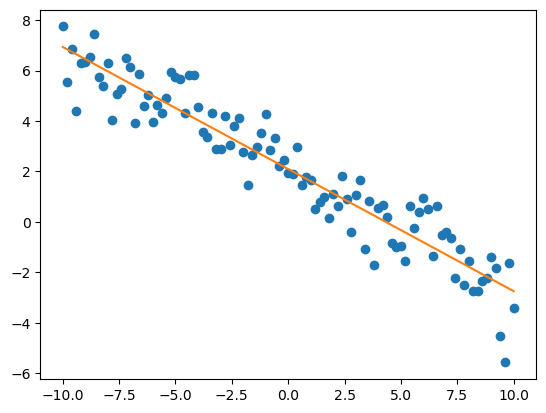

In [11]:
plt.figure() # Create new figure
plt.plot(X, Y, 'o')
plt.plot(X, theta0 + theta1*X, '-')
plt.show()

Afficher à la fois:
- l'évolution de l'erreur dans le temps
- l'évolution des valeurs absolues des dérivées partielles de l'erreur.
  
On affichera l'axe des ordonnées avec une échelle logarithme, à l'aide de `plt.yscale('log')`.

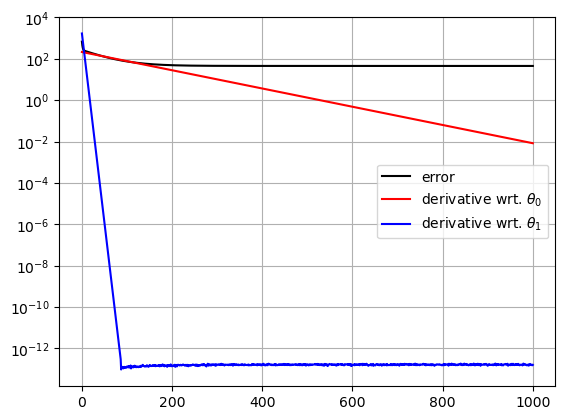

In [12]:
error_hist = [square_error_simple(theta0_hist[t], theta1_hist[t], X, Y) for t in range(len(theta0_hist))]
g0_hist, g1_hist = [], []
for t in range(len(theta0_hist)):
    g0, g1 = derivative_square_error_simple(theta0_hist[t], theta1_hist[t], X, Y)
    g0_hist.append(abs(g0))
    g1_hist.append(abs(g1))

plt.figure() # Create new figure
plt.plot(error_hist, "-k", label="error")
plt.plot(g0_hist, "-r", label="derivative wrt. $\\theta_0$")
plt.plot(g1_hist, "-b", label="derivative wrt. $\\theta_1$")
plt.legend()
plt.grid()
plt.yscale('log')
plt.show()

Implémenter (et exécuter) une version alternative de `simple_linear_regression_gradient_descent`, qui au lieu de s'arrêter après un nombre fixe d'étapes s'arrête lorsque les deux dérivées partielles de l'erreur $\frac{\partial J}{\partial \theta_0}$ et $\frac{\partial J}{\partial \theta_1}$ sont plus petites que $\lambda*J(\theta_0, \theta_1)$ où $\lambda$ est un hyperparamètre passé à la fonction.

In [13]:
def simple_linear_regression_gradient_descent_alt(X, Y, learning_rate = .01, stop = .01):
    """Simple batch gradient descent algorithm to compute a linear regression.
    Takes the training examples and the learning rate (0.01 by default) and returns (theta0, theta1, theta0_hist, theta1_hist) where theta0_hist, theta1_hist are the lists of all values taken by theta0 and theta1.
    Halting condition: when the derivates are smaller than $stop$ * the error, in absolute value."""
    theta0_hist = [0]
    theta1_hist = [0]
    theta0 = 0
    theta1 = 0
    error = square_error_simple(theta0, theta1, X, Y)
    g0, g1 = derivative_square_error_simple(theta0, theta1, X, Y)
    while max(abs(g0), abs(g1)) > stop*error:
        (theta0, theta1) = one_step_simple_linear_regression_gradient_descent(theta0, theta1, X, Y, learning_rate)
        theta0_hist.append(theta0)
        theta1_hist.append(theta1)
        error = square_error_simple(theta0, theta1, X, Y)
        g0, g1 = derivative_square_error_simple(theta0, theta1, X, Y)
    return (theta0, theta1, theta0_hist, theta1_hist)

In [14]:
theta0, theta1, _, _ = simple_linear_regression_gradient_descent_alt(X, Y, learning_rate = .0001, stop = 0.01)
print(theta0, theta1)

2.091193000312963 -0.4844953638731965


## 2. Sur les matrices

Quelques fonctions et opérateurs sur les matrices, à l'aide de `numpy`.

In [15]:
A = np.array([[0, 1], [2, 3]])
B = np.array([[2], [-1]])
print(f"A:\n {A}")
print(f"B:\n {B}")

A:
 [[0 1]
 [2 3]]
B:
 [[ 2]
 [-1]]


**Important :** on aurait aussi pu définir $A$ et $B$ avec `np.matrix` au lieu de `np.array`. Il est cependant [*découragé*](https://docs.scipy.org/doc/scipy/tutorial/linalg.html) d'utiliser `np.matrix`. On continuera d'appeler les objets qu'on manipule des matrices, même si formellement ce sont des tableaux multidimensionnels (`ndarray`).

In [16]:
print(type(A))

<class 'numpy.ndarray'>


In [17]:
# Dimension d'une matrice
print(A.shape)
print(B.shape)

(2, 2)
(2, 1)


Le produit de deux matrices $A$ et $B$ se calcule avec `A.dot(B)` ou `A @ B` (la deuxième solution est à préférer : plus clair).

In [18]:
print(A @ B)

[[-1]
 [ 1]]


Que calcule `A * B` ?

*Réponse :* Le produit terme à terme.

In [19]:
print(A * B)

[[ 0  2]
 [-2 -3]]


Pourquoi est-ce que le code suivant produit une erreur ?

*Réponse :* Les dimensions des matrices ne sont pas compatibles.

In [20]:
C = np.array([[7, 0]])
print(A @ C)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 1 is different from 2)

In [21]:
print(f"A:\n {A}")
print(f"Transposée de A:\n {A.T}")

A:
 [[0 1]
 [2 3]]
Transposée de A:
 [[0 2]
 [1 3]]


Aller regarder la documentation de [`np.concatenate`](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html) à l'aide de cette fonction, et à partir des matrices $A = \begin{pmatrix}
0 & 1\\
2 & 3
\end{pmatrix}$, $B = \begin{pmatrix}
2\\
-1
\end{pmatrix}$ et $C = \begin{pmatrix}
7 & 0
\end{pmatrix}$, construire les matrices
$\begin{pmatrix}
0 & 1 \\
2 & 3 \\
7 & 0 
\end{pmatrix}$ et $\begin{pmatrix}
0 & 1 & 2\\
2 & 3 & -1
\end{pmatrix}$.

In [22]:
print(np.concatenate((A, C)))
print(np.concatenate((A, B), axis=1))

[[0 1]
 [2 3]
 [7 0]]
[[ 0  1  2]
 [ 2  3 -1]]


La fonction `np.linalg.inv` permet de calculer l'inverse $A^{-1}$ d'une matrice $A$. 

In [23]:
A_inv = np.linalg.inv(A)
print(A_inv)

[[-1.5  0.5]
 [ 1.   0. ]]


Vérifier que $A @ A^{-1}$ et $A^{-1} @ A$ sont égales à la matrice identité $\begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix}$.

In [24]:
A @ A_inv

array([[1., 0.],
       [0., 1.]])

Expliquez les erreurs suivantes.

*Réponse :* La matrice n'est pas inversible.

In [25]:
np.linalg.inv(np.array([[1, 1], [1, 1]]))

LinAlgError: Singular matrix

Quelles sont les fonction numpy permettant de générer une matrice remplie de 0 ? Remplie de 1 ? Générer une matrice $D$ remplies de 0 de dimension $5 \times 4$, une matrice $E$ remplie de 1 de dimension $5 \times 4$, et vérifiez que $D + E$ et $D\cdot E^{T}$ donnent le résultat attendu. 

In [26]:
D = np.zeros((5, 4))
E = np.ones((5, 4))
print(D+E)
print(D @ E.T)

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


Manipulations de lignes et de colonnes :

In [27]:
A = np.array([[5*i + j for j in range(5)] for i in range(3)])
print(A)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]


In [28]:
print(A[1:,:])

[[ 5  6  7  8  9]
 [10 11 12 13 14]]


In [29]:
print(A[:, 2:4])

[[ 2  3]
 [ 7  8]
 [12 13]]


In [30]:
print(A[1:, :4])

[[ 5  6  7  8]
 [10 11 12 13]]


On veut regarder la matrice de dimension $3\times 1$ obtenue en ne gardant que la première colonne de $A$.
Quelle est la différence entre `print(A[:, 0])` et `print(A[:, 0:1])` ? Quelle solution est à préférer ?

Le premier est un array à une dimension, la deuxième un array à deux dimensions. La deuxième solution est préférable.

In [31]:
print(A[:, 0])
print(A[:, 0:1])

[ 0  5 10]
[[ 0]
 [ 5]
 [10]]


## 3. Régression linéaire multiple

On s'intéresse maintenant à la régression multiple, c'est-à-dire lorsqu'il y a plusieurs features ($n > 1$).

In [32]:
data = np.load("tp1-multiple.npy")
print(type(data))
print(data.shape)

<class 'numpy.ndarray'>
(811626, 5)


Chaque ligne de la matrice `data` contient un exemple d'entraînement $((x_1, x_2, x_3, x_4), y)$ sous la forme d'une ligne. Il y a donc $n=4$ features, et $m = 811626$ exemples.

In [33]:
print(data[0])

[-4.          1.          0.          5.4        -7.78488192]


Séparer la matrice `data` en une matrice $X$ de dimension $m\times n$ et une matrice $Y$ de dimension $m \times 1$. Rajoutez une colonne de `1` à la matrice $X$, de sorte que $X$ ait maintenant dimension $m \times (n+1)$. Quel est l'intérêt de cette dernière opération ?

*Réponse*

In [34]:
m, n = data.shape
X = data[:, :n-1]
Y = data[:, n-1:n]
X = np.concatenate((np.ones((m, 1)), X), axis=1)
n -= 1 

In [35]:
print(X.shape)
print(Y.shape)

(811626, 5)
(811626, 1)


Adaptez les fonctions de calcul d'erreur, de leur dérivées partielles, et l'algorithme de régression linéaire. Vos fonctions devront uniquement manipuler des matrices. Au lieu d'avoir des paramètres $(\theta_i)$, on ne travaillera qu'avec une unique matrice $\Theta$. Quelle est sa dimension ?

*Réponse :* (n+1,1)

In [36]:
def square_error(Theta, X, Y):
	"""Returns the square error of Theta on training examples (X, Y)."""
	return .5*(((X @ Theta - Y).T) @ (X @ Theta - Y))

In [37]:
Theta = np.zeros((n+1, 1))
square_error(Theta, X, Y)

array([[1.37099114e+08]])

In [38]:
def gradient_square_error(Theta, X, Y):
    """Returns the gradient of the square error on training examples (X, Y). The result is a matrix with the same dimension as Theta."""
    return X.T @ X @ Theta - X.T @ Y 

In [39]:
gradient_square_error(Theta, X, Y)

array([[-13141330.19615787],
       [ -3994471.58216957],
       [-34626397.21392549],
       [ -7820397.95717667],
       [-53735204.96277465]])

In [40]:
def one_step_linear_regression_gradient_descent(Theta, X, Y, learning_rate):
    """One step of the gradient descent for the multiple linear regression. Takes the parameters, the training examples and the learning rate, and returns the new values for the parameters."""
    return Theta - learning_rate*gradient_square_error(Theta, X, Y)

In [41]:
def linear_regression_gradient_descent(X, Y, nb_steps, learning_rate = .01):
    """Multiple batch gradient descent algorithm to compute a linear regression.
    Takes the training examples and the learning rate (0.01 by default) and returns (Theta, Theta_hist) where Theta_hist is the historic of all values taken by Theta.
    Halting condition: when the number of steps is reached."""
    Theta = np.zeros((n+1, 1))
    Theta_hist = [Theta]
    for _ in range(nb_steps):
        Theta = one_step_linear_regression_gradient_descent(Theta, X, Y, learning_rate)
        Theta_hist.append(Theta)
    return (Theta, np.array(Theta_hist)[:, :, 0].T)

Exécuter l'algorithme sur les données, et afficher l'évolution de l'erreur et du maximum des valeurs absolues de son gradient dans le temps.

In [42]:
Theta, Theta_hist = linear_regression_gradient_descent(X, Y, 1000, learning_rate = 10**-8)

In [43]:
print(Theta_hist.shape)
_, nb_steps = Theta_hist.shape
E = [square_error(Theta_hist[:, t:t+1], X, Y)[0,0] for t in range(nb_steps)]
G = [np.max(np.abs(gradient_square_error(Theta_hist[:, t:t+1], X, Y))) for t in range(nb_steps)]

(5, 1001)


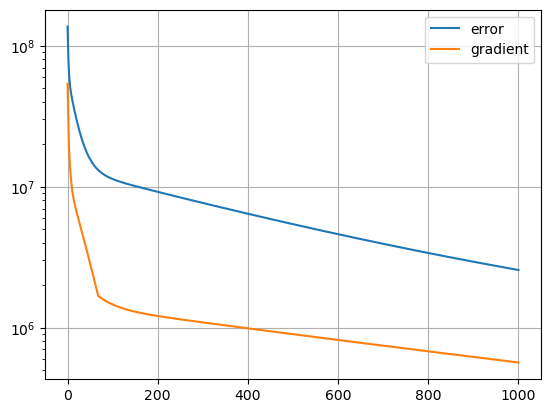

In [44]:
plt.figure()
plt.plot(E, label="error")
plt.plot(G, label="gradient")
plt.legend()
plt.grid()
plt.yscale('log')
plt.show()

In [45]:
print(E[-1]) # Last error
print(Theta)

2563518.2642963333
[[ 4.22382904]
 [ 3.13237116]
 [ 3.13304097]
 [10.2346535 ]
 [ 0.1268157 ]]


Faire varier le taux d'apprentissage et le nombre d'itérations. Quelle semble être une valeur raisonnable du taux d'apprentissage, pour (1) que l'algorithme converge et (2) que cette convergence ne soit pas trop lente ?

*Réponse :* $10^{-8}$ semble être une valeur raisonnable. (On pourra noter que ce taux correspond à environ $\frac{0.01}{m}$, comme dans la partie 1 !)

Pourquoi certains taux d'apprentissage pour lesquels la descente de gradient convergeait sur le premier exemple (avec une feature et 101 exemples) n'assurent pas la convergence sur ces nouvelles données ? (*Indice :* Regardez la formule des dérivées de l'erreur.)

*Réponse :* Car le gradient de l'erreur est proportionnel à $m$, le nombre d'exemples. Or $m$ est environ $10^4$ fois plus grand que dans la partie 1. 

Quelle simple modification peut-on faire pour prendre en compte ce problème ?

*Réponse :* On peut modifier l'algo pour qu'il divise automatiquement le taux d'apprentissage par $m$.

In [46]:
def linear_regression_gradient_descent(X, Y, nb_steps, learning_rate = .01):
    """Multiple batch gradient descent algorithm to compute a linear regression.
    Takes the training examples and the learning rate (0.01 by default) and returns (Theta, Theta_hist) where Theta_hist is the historic of all values taken by Theta.
    Halting condition: when the number of steps is reached."""
    m, _ = np.shape(X)
    Theta = np.zeros((n+1, 1))
    Theta_hist = [Theta]
    for _ in range(nb_steps):
        Theta = one_step_linear_regression_gradient_descent(Theta, X, Y, learning_rate/m)
        Theta_hist.append(Theta)
    return (Theta, np.array(Theta_hist)[:, :, 0].T)

## 4. Descente de gradient stochastique

On souhaite implémenter la descente de gradient stochastique : on prendra la version qui permute les données et utilise à la $i$-ème itération le $i$-ème exemple (après permutation). Regarder la documentation de [`np.random.shuffle`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.shuffle.html), puis permutez les données. ***ATTENTION:*** il ne faut **surtout pas** permuter $X$ puis permuter $Y$. Pourquoi ?

*Réponse :* Si on permute $X$ puis $Y$, on ne préserve pas le fait que la $i$-ème ligne de $Y$ est la valeur associée à la $i$-ème ligne de $X$.

In [47]:
# Shuffle
m, n = data.shape
np.random.shuffle(data)
X = data[:, :n-1]
Y = data[:, n-1:n]
X = np.concatenate((np.ones((m, 1)), X), axis=1)
n -= 1 

In [48]:
print(X.shape)
print(Y.shape)

(811626, 5)
(811626, 1)


In [49]:
def square_error_stoch(Theta, X, Y, i):
	"""Returns the square error of Theta computed on the $i$-th training example (X, Y)."""
	return (.5*(((X[i:i+1,:] @ Theta - Y[i]).T) @ (X[i:i+1,:] @ Theta - Y[i])))[0,0]

In [50]:
Theta = np.zeros((n+1, 1))
print(square_error_stoch(Theta, X, Y, 0))

248.9578549970052


In [51]:
def gradient_square_error_stoch(Theta, X, Y, i):
    """Returns the gradient of the square error on $i$-th training example of (X, Y). The result is a matrix with the same dimension as Theta."""
    return ((X[i:i+1,:]).T @ (X[i:i+1,:]) @ Theta - (X[i:i+1,:]).T @ Y[i:i+1,:])

In [52]:
print(gradient_square_error_stoch(Theta, X, Y, 0))

[[ -22.31402496]
 [  17.85121997]
 [ -64.71067239]
 [ -18.5950208 ]
 [-178.51219969]]


Implémenter les fonctions `one_step_linear_regression_gradient_descent_stoch` et `linear_regression_gradient_descent_stoch`. Ne pas oublier les docstrings.

In [53]:
def one_step_linear_regression_stoch(Theta, X, Y, i, learning_rate):
    """One step of the stochastic gradient descent for the multiple linear regression. Takes the parameters, the training examples, the current number of steps and the learning rate, and returns the new values for the parameters."""
    return Theta - learning_rate*gradient_square_error_stoch(Theta, X, Y, i)

In [54]:
def linear_regression_gradient_descent_stoch(X, Y, nb_steps, learning_rate = .01):
    """Multiple batch gradient descent algorithm to compute a linear regression.
    Takes the training examples and the learning rate (0.01 by default) and returns (Theta, Theta_hist) where Theta_hist is the historic of all values taken by Theta.
    Halting condition: when the number of steps is reached."""
    m, _ = X.shape
    Theta = np.zeros((n+1, 1))
    Theta_hist = [Theta]
    for i in range(nb_steps):
        Theta = one_step_linear_regression_stoch(Theta, X, Y, i % m, learning_rate)
        Theta_hist.append(Theta)
    return (Theta, np.array(Theta_hist)[:, :, 0].T)

Exécutez l'algorithme sur les données et afficher l'évolution de l'erreur et du maximum des valeurs absolues de son gradient dans le temps. Qu'observe-t-on ?

In [55]:
Theta, Theta_hist = linear_regression_gradient_descent_stoch(X, Y, 400000, learning_rate=10**-2)
print(Theta)

[[ 1.62327954]
 [ 3.25426681]
 [ 2.81347574]
 [17.92363068]
 [ 0.09421185]]


In [56]:
print(Theta_hist.shape)
Theta_hist = Theta_hist[:,[i*1000 for i in range(400)]]
print(Theta_hist.shape) 

(5, 400001)
(5, 400)


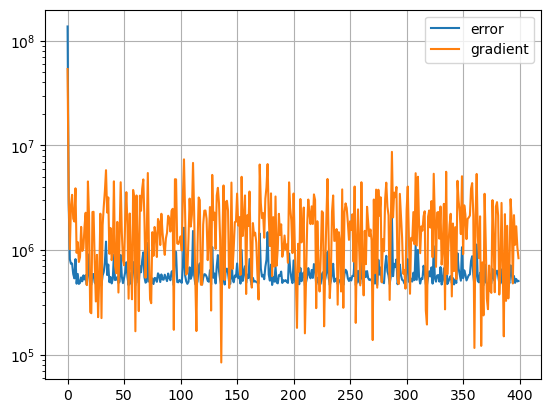

In [57]:
E = [square_error(Theta_hist[:, t:t+1], X, Y)[0,0] for t in range(400)]
G = [np.max(np.abs(gradient_square_error(Theta_hist[:, t:t+1], X, Y))) for t in range(400)]
plt.figure()
plt.plot(E, label="error")
plt.plot(G, label="gradient")
plt.legend()
plt.grid()
plt.yscale('log')
plt.show()

*Taux d'apprentissage décroissant :* Au lieu de multiplier le gradient par le taux d'apprentissage $\alpha$, le multiplier par $\frac{\alpha}{t+1}$ où $t$ est le numéro de l'itération. À quoi sert le $+1$ ?

*Réponse :* Le $+1$ sert simplement à ne pas diviser par 0 à la première étape.

In [58]:
def linear_regression_gradient_descent_stoch_descreasing_rate(X, Y, nb_steps, learning_rate = .01):
    """Multiple batch gradient descent algorithm to compute a linear regression.
    Takes the training examples and the learning rate (0.01 by default) and returns (Theta, Theta_hist) where Theta_hist is the historic of all values taken by Theta.
    Halting condition: when the number of steps is reached."""
    m, _ = X.shape
    Theta = np.zeros((n+1, 1))
    Theta_hist = [Theta]
    for i in range(nb_steps):
        Theta = one_step_linear_regression_stoch(Theta, X, Y, i % m, learning_rate/(i+1000))
        Theta_hist.append(Theta)
    return (Theta, np.array(Theta_hist)[:, :, 0].T)

In [59]:
Theta, Theta_hist = linear_regression_gradient_descent_stoch_descreasing_rate(X, Y, 400000, learning_rate=10)
Theta_hist = Theta_hist[:,[i*1000 for i in range(400)]]
print(Theta_hist.shape) 
print(Theta)

(5, 400)
[[ 1.93485084]
 [ 3.14477224]
 [ 2.6619548 ]
 [17.62735114]
 [ 0.0995665 ]]


Est-ce que l'erreur converge désormais ?

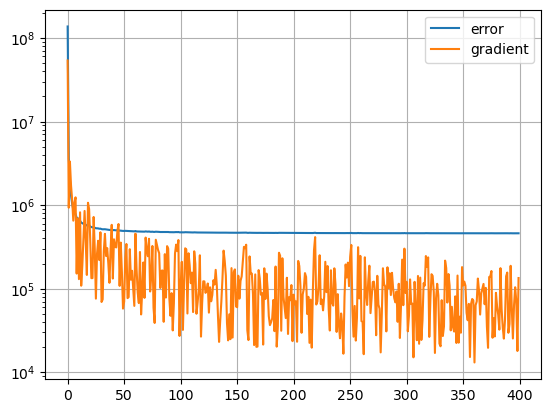

In [60]:
E = [square_error(Theta_hist[:, t:t+1], X, Y)[0,0] for t in range(400)]
G = [np.max(np.abs(gradient_square_error(Theta_hist[:, t:t+1], X, Y))) for t in range(400)]
plt.figure()
plt.plot(E, label="error")
plt.plot(G, label="gradient")
plt.legend()
plt.grid()
plt.yscale('log')
plt.show()

## 5. Méthode exacte

Implémentez la méthode exacte pour trouver $\Theta$. Quelle est la valeur de l'erreur que vous trouvez ? 

In [61]:
def exact_method(X, Y):
    """Exact method to find the parameters of a linear regression."""
    return np.linalg.inv(X.T @ X) @ X.T @ Y

In [62]:
Theta_opt = exact_method(X, Y)
print(Theta_opt)

[[ 1.62261037]
 [ 3.14143344]
 [ 2.71680415]
 [17.89040664]
 [ 0.10107087]]


In [63]:
print(square_error(Theta_opt, X, Y))
print(gradient_square_error(Theta_opt, X, Y))

[[456149.44172741]]
[[-3.48314643e-07]
 [-2.29105353e-07]
 [-1.55717134e-06]
 [-2.71946192e-07]
 [-8.12113285e-07]]


L'erreur peut avoir l'air grande mais il ne faut pas oublier qu'elle est proportionelle à $m$. La grandeur importante à surveiller est le gradient : ses valeurs sont négligeables, la valeur `Theta_opt` qu'on a calculé correspond donc bien au paramètre minimisant l'erreur.

## 6. SciKit

Lisez la section [1.1.1. Ordinary Least Squares](https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares) de SciKit-Learn puis la [documentation de la classe `LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression). Utilisez `scikit` pour trouver $\Theta$.

In [64]:
from sklearn import linear_model
reg = linear_model.LinearRegression()

Avec scikit, pas besoin de rajouter la colonne de `1' comme on avait fait dans les parties 3 et 4 !

In [65]:
m, n = data.shape
np.random.shuffle(data)
X = data[:, :n-1]
Y = data[:, n-1:n]
n -= 1

In [66]:
reg.fit(X, Y)
print(reg.coef_)

[[ 3.14143344  2.71680415 17.89040664  0.10107087]]


Pour obtenir $\theta_0$, il faut utiliser `model.intercept_`.

In [67]:
print(reg.intercept_)

[1.62261037]


## 7. Pour aller plus loin

On va reprendre le code pour la régression linéaire stochastique et le rendre plus propre / versatile. Il a principalement deux désavantages (qui s'appliquent aussi à la regression linéaire classique) :
1. la condition d'arrêt n'est pas flexible : on ne peut par exemple pas dire "arrête-toi après $10^6$ itérations, ou avant si le gradient est très petit devant l'erreur",
2. on retourne *l'intégralité* des valeurs prises par $\Theta$, même si on n'en a pas besoin, ou qu'on a juste besoin de calculer l'erreur.

On va d'abord voir deux outils classiques en Python qui vous nous permettre de résoudre ces problèmes : le passage de fonctions en argument, et les générateurs.

### Passage de fonctions en argument

Le principe est simple : on peut passer comme argument à une fonction une autre fonction.

In [68]:
def apply(f, x, y):
    """Takes a function f, and returns its output on x, y."""
    return f(x, y)

In [69]:
def sum_square(x, y):
    return x**2 + y**2

apply(sum_square, 3, 4)

25

Si le nombre de paramètres de $f$ n'est pas connu, on peut s'en sortir grâce aux tuples.

In [70]:
print(type((1, 2, 3)))
print(type((1,)))
print(type((1)))

<class 'tuple'>
<class 'tuple'>
<class 'int'>


Attention : $(1, 2, 3)$ et $(1, )$ sont des tuples, mais pas $(1)$.

In [71]:
def apply_tuple(f, t):
    """Returns the result of function f applied to tuple t."""
    return f(*t)

def f(x, y, z):
    return x + y + z 

apply_tuple(f, (1, 2, 3))

6

Essayer de remplacer `f(*t)` par `f(t)`. Que se passe-t-il ? L'opérateur `*` s'appelle ["unpacking operator"](https://www.pythonforbeginners.com/basics/unpacking-in-python).

**Lambda expressions :** Une façon assez pratique (mais limitée) de définir des courtes fonctions en Python est avec les [lambda fonctions](https://www.w3schools.com/python/python_lambda.asp).

In [72]:
f = lambda x, y: x + y

f(3, 2)

5

Un exemple plus avancé (mais parfaitement artificiel) : on va faire une fonction `prime` qui prend en entrée une fonction $f$ de `int` vers `bool`, et retourne tous les nombres premiers jusqu'à ce que $f(x)$ devienne faux.

In [73]:
from math import sqrt

def prime(f):
    prime_numbers = []
    n = 2
    while f(n):
        if not [d for d in range(2, int(sqrt(n))+1) if n % d == 0]:
            prime_numbers.append(n)
        n += 1
    return prime_numbers


Si `l` est une liste `bool(l)` vaut `True` si et seulement si `l` est non-vide. La condition `if not [d for d in range(2, int(sqrt(n))+1) if n % d == 0]` est donc satisfaite si et seulement si il n'y a pas de nombre $d$ entre $2$ et $\sqrt{n}$ tel que $d$ divise $n$.

In [74]:
prime(lambda x: x < 50)

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47]

In [75]:
# Au passage…
print(prime(lambda x: x < 50))
print(*prime(lambda x: x < 50))

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47]
2 3 5 7 11 13 17 19 23 29 31 37 41 43 47


Quels sont les nombres premiers $n$ tels que $n^2*e^n < 6981420000$ ? On utilisera une lambda fonction.

In [76]:
from math import exp

In [77]:
print(prime(lambda x: x**2*exp(x) < 6981420000))

[2, 3, 5, 7, 11, 13, 17]


### Générateurs

Le principe d'un générateur est de… générer des objets. Contrairements à une fonction classique (qui va retourner une valeur), un générateur (1) s'initialise, puis (2) s'appelle pour produire (ou faire) quelque chose. Le mot clé principal est `yield` : c'est ce qui permet à la fonction de produire un résultat. La différence crucialle avec `return` est que lorsqu'on rappellera le générateur une second fois, il reprendra son exécution là où il s'était arrêté !

In [78]:
def number_generator():
    x = 0
    while True:
        yield(x)
        x += 1

In [79]:
g = number_generator()
print(next(g))
print(next(g))
print(next(g))
print(next(g))
print(next(g))

0
1
2
3
4


Un générateur peut aussi s'arrêter !

In [80]:
def number_generator():
    x = 0
    while x < 10:
        yield(x)
        x += 1

In [81]:
g = number_generator()
for _ in range(11):
    print(next(g))

0
1
2
3
4
5
6
7
8
9


StopIteration: 

Écrire un générateur `prime_generator()` qui produit tous les nombres premiers.

In [ ]:
def prime_generator():
    n = 2
    primes = []
    while True:
        if not [p for p in primes if n % p == 0]:
            primes.append(n)
            yield n
        n += 1

In [ ]:
# Prints all primes p such that exp(p) <= 13751*p^3 + 321426*p^2.
pg = prime_generator()
p = next(pg)
while exp(p) <= 13751*(p**3) + 321426*(p**2):
    print(p)
    p = next(pg)

Un autre intérêt des générateurs (qu'on n'utilisera pas ici) est de pouvoir par exemple écrire des choses comme :
```
for n in prime_generator():
    print(n)
```
Il est cependant conseillé de réserver ça à des générateurs qui terminent (pas comme les notres).

### Application : une autre façon de coder la régression linéaire

Pour coder la `v2` de la régression linéaire multiple avec descente de gradient stochastique (l'algo de la section 4), on va utiliser une pointe de POO et des générateurs. Le learning rate, au lieu d'être une constante $\alpha$, ou $\frac{\alpha}{t+1}$, sera désormais une fonction de $t$.

In [ ]:
class LinearRegressionStochastic():
    """Multiple linear regression, computed using stochastic gradient descent."""
    def __init__(self, data, learning_rate):
        """Initializes the attributes & shuffles the data."""
        m, n = data.shape
        np.random.shuffle(data)
        self.X = np.concatenate((np.ones((m, 1)), data[:, :n-1]), axis=1)
        self.Y = data[:, n-1:n]
        self.m = m # Number of examples
        self.n = n-1 # Number of attributes
        self.steps = 0 # Total number of steps done by the gradient descent
        self.Theta = np.zeros((self.n+1, 1)) # parameters
        self.learning_rate = learning_rate # function which takes as input the number of steps
    def error(self):
        """Todo"""
        return (.5*(((self.X @ self.Theta - self.Y).T) @ (self.X @ self.Theta - self.Y)))[0, 0]
    def error_stoch(self, i):
        """Todo"""
        return (.5*(((self.X[i:i+1,:] @ self.Theta - self.Y[i:i+1,:]).T) @ (self.X[i:i+1,:] @ self.Theta - self.Y[i:i+1,:])))[0, 0]
    def gradient(self):
        """Todo"""
        return self.X.T @ self.X @ self.Theta - self.X.T @ self.Y
    def gradient_stoch(self, i):
        """Returns the gradient of the square error on $i$-th training example.
        The result is a matrix with the same dimension as Theta."""
        return ((self.X[i:i+1,:]).T @ (self.X[i:i+1,:]) @ self.Theta - (self.X[i:i+1,:]).T @ self.Y[i:i+1,:])
    def descent(self):
        """Generator which computes the gradient descent."""
        while True:
            self.Theta = self.Theta - self.learning_rate(self.steps)*self.gradient_stoch(self.steps % m)
            self.steps += 1
            yield self.Theta

Le but est que le code suivant puisse s'exécuter.

In [ ]:
model = LinearRegressionStochastic(data, lambda t: 10/(t+1000))
while model.steps < 1000000:
    next(model.descent())

In [ ]:
print(model.Theta)